In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load  Dataset


In [3]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter =',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter =',')


In [4]:
X_train = X_train / 250.0
X_test = X_test / 250.0

Y_train = Y_train / 250.0
Y_test = Y_test / 250.0


In [5]:
X_train = X_train.reshape(len(X_train), 100, 100,3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test) , 100,100,3)
Y_test = Y_test.reshape(len(Y_test) ,1)                     

In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


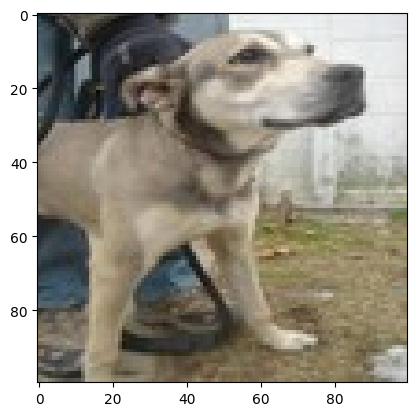

In [7]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

## Model

In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation= 'relu' ,input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation= 'relu'))
model.add(Dense(1, activation = 'sigmoid'))



c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss= 'binary_crossentropy', optimizer= 'adam' , metrics=['accuracy'])


In [10]:
model.fit(X_train, Y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.4684 - loss: 0.1098
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.5089 - loss: 0.0157
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.5031 - loss: 0.0149
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4843 - loss: 0.0150
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5015 - loss: 0.0144


In [11]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.7916 - loss: 0.0068


[0.014324101619422436, 0.5]

### Making predictions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.02].


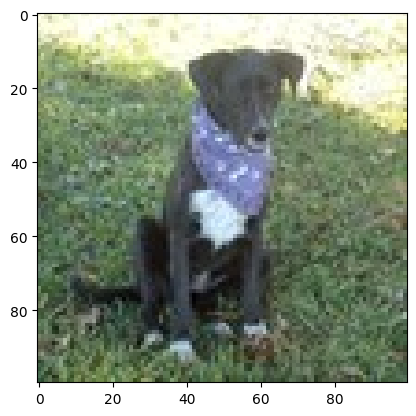

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
 Our Model Says it is a :  dog


In [37]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.1

if(y_pred == 0):
    pred = 'dog'
else:
    pred = "cat"

print(" Our Model Says it is a : " , pred)        

